In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/toUpperCase78/formula1-datasets

# Switch the data to be amount of times a driver has crashed at a track in the past

## track, driver, year, crashed, 

In [125]:
f2019 = pd.read_csv('data/Formula1_2019.csv')
f2020 = pd.read_csv('data/Formula1_2020.csv')
f2021 = pd.read_csv('data/Formula1_2021.csv')
f2022 = pd.read_csv('data/Formula1_2022.csv')
f2023 = pd.read_csv('data/Formula1_2023.csv')

## Drop unnessesary columns

In [126]:
f2023 = f2023.drop('Set Fastest Lap', axis = 1)
f2022 = f2022.drop('+1 Pt', axis = 1)
f2021 = f2021.drop('+1 Pt', axis = 1)

f2023 = f2023.drop('Fastest Lap Time', axis = 1)
f2022 = f2022.drop('Fastest Lap', axis = 1)
f2021 = f2021.drop('Fastest Lap', axis = 1)
f2020 = f2020.drop('Fastest Lap', axis = 1)
f2019 = f2019.drop('Fastest Lap', axis = 1)

f2023 = f2023.drop('Points', axis = 1)
f2022 = f2022.drop('Points', axis = 1)
f2021 = f2021.drop('Points', axis = 1)
f2020 = f2020.drop('Points', axis = 1)
f2019 = f2019.drop('Points', axis = 1)

f2023 = f2023.drop('Laps', axis = 1)
f2022 = f2022.drop('Laps', axis = 1)
f2021 = f2021.drop('Laps', axis = 1)
f2020 = f2020.drop('Laps', axis = 1)
f2019 = f2019.drop('Laps', axis = 1)

f2020.rename(columns={'Total Time/Gap/Retirement': 'Time/Retired'}, inplace=True)
f2019.rename(columns={'Total Time/Gap/Retirement': 'Time/Retired'}, inplace=True)

## Combine into one dataset

In [127]:
combined = pd.concat([f2019, f2020, f2021, f2022, f2023], ignore_index=True, sort=False)

## Convert NC into -1 and convert the rest into int64

In [128]:
# combined.loc[combined['Starting Grid'].isin(['NC']), 'Time/Retired'] = -1

# combined['Starting Grid'] = combined['Starting Grid'].astype(np.int64)


combined['Position'] = combined['Time/Retired']
combined.drop('Time/Retired', axis = 1, inplace = True)
combined.head()


,Track,Position,No,Driver,Team,Starting Grid
0,Australia,1:25:27.325,77,Valtteri Bottas,Mercedes,2
1,Australia,+20.886,44,Lewis Hamilton,Mercedes,1
2,Australia,+22.520,33,Max Verstappen,Red Bull Racing Honda,4
3,Australia,+57.109,5,Sebastian Vettel,Ferrari,3
4,Australia,+58.230,16,Charles Leclerc,Ferrari,5


## Convert target to 0 and 1
1 means Did not start/finish.

0 means finished/started

In [129]:
combined.loc[combined['Position'].isin(['DNF', 'DNS']), 'Position'] = 1

In [130]:
combined.loc[~combined['Position'].isin([1]), 'Position'] = 0

In [131]:
combined['Position'] = combined['Position'].astype(np.int64)

In [132]:
combined.head()

,Track,Position,No,Driver,Team,Starting Grid
0,Australia,0,77,Valtteri Bottas,Mercedes,2
1,Australia,0,44,Lewis Hamilton,Mercedes,1
2,Australia,0,33,Max Verstappen,Red Bull Racing Honda,4
3,Australia,0,5,Sebastian Vettel,Ferrari,3
4,Australia,0,16,Charles Leclerc,Ferrari,5


## Get rid of 30% of data if position is 0 to balance out the data

In [133]:
print(len(combined))
n = 900
combined = combined.drop(combined[combined['Position'].eq(0)].sample(n).index)

1940


In [134]:
len(combined)

1040

## Convert to numerical and split into X and y

In [135]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(42)

X = combined.drop('Position', axis = 1)
y = combined['Position']

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

categorical_features = ['Track', 'Driver', 'Team']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)




In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(42)

X = combined.drop('Position', axis = 1)
y = combined['Position']

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

categorical_features = ['Track', 'Driver', 'Team']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)


## I tried stratification here. It worked a little bit

In [137]:
# # Import train_test_split from sklearn's model_selection module
# from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# np.random.seed(42)

# X = combined.drop('Position', axis = 1)
# y = combined['Position']

# categorical_features = ['Track', 'Driver', 'Team']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder = 'passthrough')

# X_transformed = transformer.fit_transform(X)

# model = RandomForestClassifier()

# # Use train_test_split to split X & y into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5)

# for i, (train_index, test_index) in enumerate(sss.split(X_transformed, y)):
#     X_train = X_transformed[train_index]
#     y_train = y.iloc[train_index]
    
#     X_test = X_transformed[test_index]
#     y_test = y.iloc[test_index]

#     model.fit(X_train, y_train)
#     y_preds = model.predict(X_test)
    
#     accuracy = accuracy_score(y_test, y_preds)
# #     classification_rep = classification_report(y_test, y_preds)
    
#     accuracy = accuracy_score(y_test, y_preds)
#     precision = precision_score(y_test, y_preds)
#     recall = recall_score(y_test, y_preds)
#     f1 = f1_score(y_test, y_preds)
    
#     print(f"Fold {i+1} Accuracy: {accuracy}")
#     print(f"Fold {i+1} Accuracy: {accuracy}, Precision: {precision}, recall: {recall}, f1: {f1}")
# #     print(f"Fold {i+1} Classification Report:\n{classification_rep}")

    

# #     X_train_transformed = transformer.fit_transform(X_train)
# #     X_test_transformed = transformer.transform(X_test)
    
# #     model.fit(X_train_transformed, y_train)
# #     accuracy = model.score(X_test_transformed, y_test)
# #     print(f"Fold {i+1} Accuracy: {accuracy}")




### Make a models dictionary

In [138]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier

In [139]:
np.random.seed(42)
models = {"LinearSVC": LinearSVC(max_iter=1000),
          "LogisticRegression": LogisticRegression(max_iter=1000),
         'Bagging': BaggingClassifier(),
         "SVC": SVC(kernel="rbf", gamma=0.7, max_iter=1000),
         "RandomForestClassifier": RandomForestClassifier(n_estimators=100)}
results = {}

In [140]:
# model = LinearSVC()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

## Test Models

In [141]:
np.random.seed(42)
for model_name, model in models.items():
    model.fit(X_train_transformed, y_train)
    results[model_name] = model.score(X_test_transformed, y_test)

# View the results
results

C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'LinearSVC': 0.5432692307692307,
 'LogisticRegression': 0.6875,
 'Bagging': 0.6586538461538461,
 'SVC': 0.7259615384615384,
 'RandomForestClassifier': 0.6730769230769231}

<Axes: >

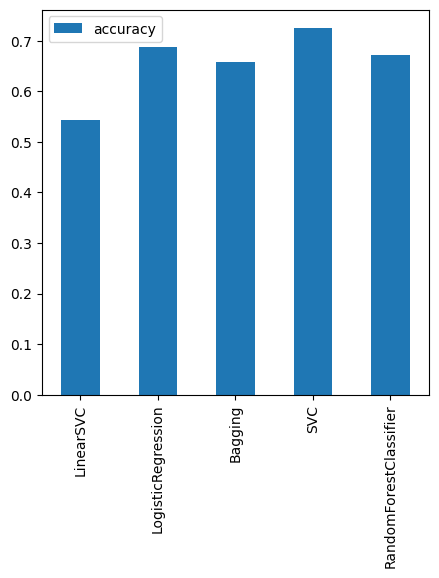

In [142]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=['accuracy'])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar(figsize = (5, 5))

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [144]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                  'precision': round(precision, 2),
                  'recall': round(recall, 2),
                  'f1': round(f1, 2)
                  }
    print(metric_dict)
    return metric_dict

In [145]:
grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
       'max_depth': [None, 5, 10, 20, 30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2, 4, 6],
       'min_samples_leaf': [1, 2, 4]}
# grid = {'max_iter': [10, 100, 200, 500, 1000, 1200],
#        'degree': [1, 3, 5, 7],
#        'gamma': ['scale', 'auto'],
#        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator = model,
                           param_distributions = grid,
                           n_iter = 10, #number of models to try
                           cv = 5,
                           verbose = 2)

# Fit the randomizedsearchcv version of model
rs_model.fit(X_train_transformed, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100

C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.6s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.0s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavio

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\avysk\Desktop\Code\Machine-Learning\formula-1\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [147]:
rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [148]:
y_preds_rs = model.predict(X_test_transformed)

# Evaluate the classifier
model_metrics = evaluate_preds(y_test, y_preds_rs)

{'accuracy': 0.67, 'precision': 0.29, 'recall': 0.12, 'f1': 0.17}


In [149]:
model.predict(X_test_transformed)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [103]:
my_test = pd.read_csv('data/My test.csv')


transformed_test = transformer.transform(my_test)

model.predict(transformed_test)

array([1, 0, 0, 0], dtype=int64)